In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as re
import xmltodict as xml2dict
from collections import OrderedDict

%matplotlib inline

In [2]:
url = 'http://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ListarProposicoes'
params = {
    'sigla':'',
    'numero':'',
    'ano':'',
    'datApresentacaoIni':'',
    'datApresentacaoFim':'',
    'parteNomeAutor':'',
    'idTipoAutor':'',
    'siglaPartidoAutor':'',
    'siglaUFAutor':'',
    'generoAutor':'',
    'codEstado':'',
    'codOrgaoEstado':'',
    'emTramitacao':''
}

In [224]:
params['sigla'] = 'PL'
params['ano'] = '2017'
params['siglaUFAutor'] = ''
response = re.get(url, params)
print('URL: %s\nStatus: %s' % (response.url, response.status_code))

URL: http://www.camara.leg.br/SitCamaraWS/Proposicoes.asmx/ListarProposicoes?generoAutor=&siglaUFAutor=&ano=2017&numero=&codOrgaoEstado=&emTramitacao=&datApresentacaoIni=&idTipoAutor=&siglaPartidoAutor=&codEstado=&datApresentacaoFim=&parteNomeAutor=&sigla=PL
Status: 200


In [225]:
tree = xml2dict.parse(response.content)


In [226]:
tree.keys()

[u'proposicoes']

In [227]:
proposicoes = tree['proposicoes']
[x for x in proposicoes.keys()]

[u'proposicao']

In [228]:
proposicoes['proposicao'][0].keys()

[u'id',
 u'nome',
 u'tipoProposicao',
 u'numero',
 u'ano',
 u'orgaoNumerador',
 u'datApresentacao',
 u'txtEmenta',
 u'txtExplicacaoEmenta',
 u'regime',
 u'apreciacao',
 u'autor1',
 u'qtdAutores',
 u'ultimoDespacho',
 u'situacao',
 u'indGenero',
 u'qtdOrgaosComEstado']

In [241]:
proposicao = proposicoes['proposicao']

In [242]:
new_dict = {}
chaves_to_delete = []

for prop in proposicao:
    for item in prop:
        if isinstance(prop[item], OrderedDict):
            for x in prop[item].items():
                new_dict[item+'_'+x[0]] = x[1]
            chaves_to_delete.append(item)
            prop.update(new_dict)

In [243]:
for prop in proposicao:
    for chave in prop.keys():
        if chave in chaves_to_delete:
            del prop[chave]

In [244]:
proposicao_df = pd.DataFrame(proposicao)
proposicao_df.head()

,id,nome,numero,ano,datApresentacao,txtEmenta,txtExplicacaoEmenta,qtdAutores,indGenero,qtdOrgaosComEstado,...,autor1_codPartido,autor1_txtSiglaUF,ultimoDespacho_datDespacho,ultimoDespacho_txtDespacho,situacao_id,situacao_descricao,situacao_principal_proposicaoPrincipal,situacao_principal_codProposicaoPrincipal,situacao_orgao_codOrgaoEstado,situacao_orgao_siglaOrgaoEstado
0,2153387,PL 8727/2017,8727,2017,28/9/2017 11:17:00,Estabelece medidas de combate à corrupção e à ...,None,1,o,0,...,140,SP,None,None,None,None,None,0,None,None
1,2153349,PL 8726/2017,8726,2017,28/9/2017 10:02:00,Inscreve o nome de Dom José Maria Pires no Liv...,None,1,o,0,...,134,PB,None,None,None,None,None,0,None,None
2,2153334,PL 8725/2017,8725,2017,28/9/2017 09:37:00,Acrescenta parágrafo único ao art. 307 do Decr...,None,1,o,0,...,134,GO,None,None,None,None,None,0,None,None
3,2153324,PL 8724/2017,8724,2017,27/9/2017 22:06:00,Institui o Fundo Soberano Brasileiro para regu...,None,1,o,1,...,111,RJ,None,None,905,Aguardando Despacho do Presidente da Câmara do...,None,0,100001,SECAP(SGM)
4,2153312,PL 8723/2017,8723,2017,27/9/2017 20:46:00,Institui o Dia Nacional do Terço dos Homens.,None,1,o,1,...,126,SE,None,None,905,Aguardando Despacho do Presidente da Câmara do...,None,0,100001,SECAP(SGM)


In [246]:
proposicao_df.dropna(axis=1, inplace=True)

In [247]:
shape = proposicao_df.shape
print('%s linhas, %s colunas' % (shape[0], shape[1]))

1940 linhas, 21 colunas


In [248]:
proposicao_df.columns

Index([u'id', u'nome', u'numero', u'ano', u'datApresentacao', u'txtEmenta',
       u'qtdAutores', u'indGenero', u'qtdOrgaosComEstado',
       u'tipoProposicao_id', u'tipoProposicao_sigla', u'tipoProposicao_nome',
       u'orgaoNumerador_sigla', u'orgaoNumerador_nome', u'orgaoNumerador_id',
       u'regime_txtRegime', u'regime_codRegime', u'apreciacao_txtApreciacao',
       u'apreciacao_id', u'autor1_txtNomeAutor',
       u'situacao_principal_codProposicaoPrincipal'],
      dtype='object')

In [270]:
condicao = [proposicao_df['autor1_txtNomeAutor'], proposicao_df['numero']]
count_by_autor = proposicao_df.groupby(condicao)[['id']].count()
count_by_autor.sort_values(by='id', ascending=False).head(10)

id
autor1_txtNomeAutor  numero    
Adail Carneiro       7368     1
Miguel Lombardi      8369     1
Nelson Pellegrino    7042     1
Nelson Padovani      7437     1
Mário Negromonte Jr. 7894     1
Mário Heringer       8700     1
                     8385     1
                     7317     1
Márcio Marinho       7931     1
                     7260     1

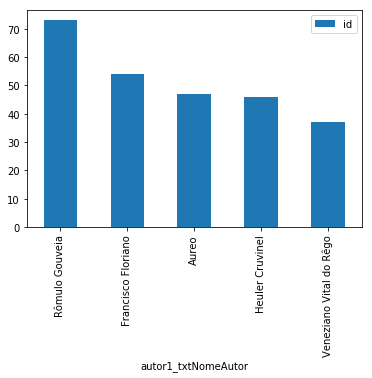

In [250]:
count_by_autor.sort_values(by='id', ascending=False).head().plot.bar()

In [273]:
proposicao_df[proposicao_df['numero'] == '8700']

,id,nome,numero,ano,datApresentacao,txtEmenta,qtdAutores,indGenero,qtdOrgaosComEstado,tipoProposicao_id,...,tipoProposicao_nome,orgaoNumerador_sigla,orgaoNumerador_nome,orgaoNumerador_id,regime_txtRegime,regime_codRegime,apreciacao_txtApreciacao,apreciacao_id,autor1_txtNomeAutor,situacao_principal_codProposicaoPrincipal
27,2153055,PL 8700/2017,8700,2017,27/9/2017 11:09:00,"Altera a Lei nº 6.015, de 31 de dezembro de 19...",1,o,1,139,...,Projeto de Lei,PLEN,PLENÁRIO,180,.,99,.,99,Mário Heringer,0


In [3]:
prop = pd.read_csv('../data/proposicoes.csv')

In [5]:
prop.head()

,tipo,numero,ano,nome_proposicao,id_proposicao,id_proposicao_principal,nome_proposicao_origem,tipo_proposicao,tema,ementa,...,partido_autor,data_apresentacao,regime_tramitacao,data_ultimo_despacho,ultimo_despacho,apreciacao,indexacao,situacao,link_inteiro_teor,apensadas
0,REQ,1030,2015,REQ 1030/2015 => PL 644/2015,1049075,994678.0,NaN,Requerimento de Urgência (Art. 155 do RICD),NaN,"Com base no art. 155 do Regimento Interno, req...",...,PP,18/03/2015,.,NaN,NaN,.,NaN,MESA - Tramitação do Requerimento Finalizada,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN
1,REQ,1041,2015,REQ 1041/2015 => PL 6232/2013,1049167,589924.0,NaN,Requerimento de Urgência (Art. 155 do RICD),NaN,"Requeremos a Vossa Excelência, nos termos do a...",...,PMDB,18/03/2015,.,NaN,NaN,.,NaN,COAPP(SGM) - Aguardando Encaminhamento,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN
2,PL,846,2015,PL 846/2015,1049380,NaN,NaN,Projeto de Lei,Direito Penal e Processual Penal,Acrescenta parágrafo ao artigo 121 do Decreto-...,...,PMDB,19/03/2015,Urgência art. 155 RICD,19/03/2015,Apense-se à(ao) PL-3131/2008. Proposição Sujei...,Proposição Sujeita à Apreciação do Plenário,"Alteração, Código Penal, agravação penal, homi...",Tranformada no(a) Lei Ordinária 13142/2015,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN
3,MPV,671,2015,MPV 671/2015,1050558,NaN,NaN,Medida Provisória,Desporto e Lazer; Tributação,Institui o Programa de Modernização da Gestão ...,...,NaN,20/03/2015,Urgência,01/07/2015,Ao Plenário para leitura. Publique-se.,Proposição Sujeita à Apreciação do Plenário,"Alteração, Estatuto de Defesa do Torcedor, Lei...",Tranformada no(a) Lei Ordinária 13155/2015,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN
4,PL,863,2015,PL 863/2015,1050643,NaN,NaN,Projeto de Lei,Tributação,"Altera a Lei nº 12.546, de 14 de dezembro de 2...",...,NaN,20/03/2015,Urgência art. 64 CF,13/05/2015,Revejo o despacho de deferimento proferido no ...,Proposição Sujeita à Apreciação do Plenário,"Alteração, Lei do Bem, contribuição previdenci...",Tranformada no(a) Lei Ordinária 13161/2015,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN


In [7]:
prop['autor']

0                                       Eduardo da Fonte
1                                      Leonardo Picciani
2                                      Leonardo Picciani
3                                        Poder Executivo
4                                        Poder Executivo
5                                      Leonardo Picciani
6                                         Mendonça Filho
7                                       Celso Russomanno
8                                       Eduardo da Fonte
9                                       Eduardo da Fonte
10                                      Eduardo da Fonte
11                                      Eduardo da Fonte
12                                        Mendonça Filho
13                                        Senado Federal
14                                       Poder Executivo
15                                           Jorge Solla
16                                        Mendonça Filho
17     Comissão de Relações Ext

In [9]:
prop.columns

Index([u'tipo', u'numero', u'ano', u'nome_proposicao', u'id_proposicao',
       u'id_proposicao_principal', u'nome_proposicao_origem',
       u'tipo_proposicao', u'tema', u'ementa', u'explicacao_ementa', u'autor',
       u'ide_cadastro', u'uf_autor', u'partido_autor', u'data_apresentacao',
       u'regime_tramitacao', u'data_ultimo_despacho', u'ultimo_despacho',
       u'apreciacao', u'indexacao', u'situacao', u'link_inteiro_teor',
       u'apensadas'],
      dtype='object')

7    Com base no art. 155 do Regimento Interno, req...
Name: ementa, dtype: object
